# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import time

from datetime import datetime
import scipy.stats as st
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#Output Data File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

In [2]:
#Generate the Cities List by Using the citipy Library
#Empty list for holding the latitude and longitude combinations
lat_lngs = []

#Empty list for holding the cities names
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

saved_lats = []
saved_longs = []


#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs: 
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

# If the city is unique, then add it to a our cities list

    if city not in cities:
        cities.append(city)
        saved_lats.append(lat_lng[0])
        saved_longs.append(lat_lng[1])
#Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

city_list = pd.DataFrame({"City":cities, "Approx. Latitude":saved_lats, "Approx. Longitude":saved_longs})
city_list.head()

Number of cities in the list: 602


,City,Approx. Latitude,Approx. Longitude
0,pali,25.726588,73.160064
1,northam,-28.531149,119.501519
2,adamstown,-54.601873,-127.113845
3,ushuaia,-84.579728,-63.904030
4,todos santos,23.464256,-109.948272


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units={units}&appid=77a1b55fe8ca0310457bae0c85fcf767"  # Replace YOUR_API_KEY with your actual API key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        import requests

        # Send GET request to OpenWeatherMap API
        response = requests.get(city_url)
        
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pali
Processing Record 2 of Set 1 | northam
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | todos santos
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | newman
Processing Record 9 of Set 1 | happy valley-goose bay
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | keflavik
Processing Record 13 of Set 1 | thunder bay
Processing Record 14 of Set 1 | wynyard
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | kirensk
Processing Record 17 of Set 1 | aosta
Processing Record 18 of Set 1 | lorengau
Processing Record 19 of Set 1 | villa bruzual
Processing Record 20 of Set 1 | onega
Processing Record 21 of Set 1 | west island
Processing Record 22 of Set 1 | margate
Processing Record 23 

Processing Record 42 of Set 4 | afaahiti
Processing Record 43 of Set 4 | ungsang-nodongjagu
Processing Record 44 of Set 4 | guaratinga
Processing Record 45 of Set 4 | sitka
Processing Record 46 of Set 4 | talcahuano
Processing Record 47 of Set 4 | ulanhot
Processing Record 48 of Set 4 | lambunao
Processing Record 49 of Set 4 | narasannapeta
Processing Record 0 of Set 5 | twon-brass
Processing Record 1 of Set 5 | jinghong
Processing Record 2 of Set 5 | san antonio de pale
Processing Record 3 of Set 5 | fada
Processing Record 4 of Set 5 | port elizabeth
Processing Record 5 of Set 5 | faya-largeau
Processing Record 6 of Set 5 | serov
Processing Record 7 of Set 5 | aral
Processing Record 8 of Set 5 | port saint john's
Processing Record 9 of Set 5 | soure
Processing Record 10 of Set 5 | vila franca do campo
Processing Record 11 of Set 5 | ribeira brava
Processing Record 12 of Set 5 | luderitz
Processing Record 13 of Set 5 | papao
Processing Record 14 of Set 5 | saipan
Processing Record 15 o

Processing Record 33 of Set 8 | ugoofaaru
Processing Record 34 of Set 8 | antofagasta
Processing Record 35 of Set 8 | kingston
Processing Record 36 of Set 8 | yazykovo
Processing Record 37 of Set 8 | balykshi
Processing Record 38 of Set 8 | sarmiento
Processing Record 39 of Set 8 | dubbo
Processing Record 40 of Set 8 | laguna
Processing Record 41 of Set 8 | alaghsas
Processing Record 42 of Set 8 | portland
Processing Record 43 of Set 8 | kogalym
Processing Record 44 of Set 8 | cuatro cienegas de carranza
Processing Record 45 of Set 8 | itoman
Processing Record 46 of Set 8 | praia da vitoria
Processing Record 47 of Set 8 | labasa
Processing Record 48 of Set 8 | belle plaine
Processing Record 49 of Set 8 | aykhal
Processing Record 0 of Set 9 | timimoun
Processing Record 1 of Set 9 | korla
Processing Record 2 of Set 9 | turpan
Processing Record 3 of Set 9 | saldanha
Processing Record 4 of Set 9 | lincoln city
Processing Record 5 of Set 9 | tura
Processing Record 6 of Set 9 | iwaki
Process

Processing Record 17 of Set 12 | tepecoacuilco de trujano
Processing Record 18 of Set 12 | betio village
Processing Record 19 of Set 12 | porto novo
Processing Record 20 of Set 12 | obo
Processing Record 21 of Set 12 | calbayog city
Processing Record 22 of Set 12 | ambalangoda
Processing Record 23 of Set 12 | guiuan
Processing Record 24 of Set 12 | gulf shores
Processing Record 25 of Set 12 | kataragama
City not found. Skipping...
Processing Record 26 of Set 12 | ati
Processing Record 27 of Set 12 | bonthe
Processing Record 28 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 29 of Set 12 | paros
Processing Record 30 of Set 12 | uvel'skiy
Processing Record 31 of Set 12 | dompu
Processing Record 32 of Set 12 | aljezur
Processing Record 33 of Set 12 | mizdah
Processing Record 34 of Set 12 | skeldon
Processing Record 35 of Set 12 | hadibu
Processing Record 36 of Set 12 | tongren
Processing Record 37 of Set 12 | san julian
Processing Record 38 of Set 12 | karyes
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pali,0,IN,1683588048,14,25.7667,73.3333,84.11,6.15
1,northam,100,GB,1683588002,98,51.0333,-4.2167,54.61,7.85
2,adamstown,100,PN,1683588048,56,-25.0660,-130.1015,70.84,13.29
3,ushuaia,75,AR,1683588048,57,-54.8000,-68.3000,47.86,13.80
4,todos santos,12,MX,1683588049,68,23.4500,-110.2167,72.45,10.85


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,pali,0,IN,1683588048,14,25.7667,73.3333,84.11,6.15
1,northam,100,GB,1683588002,98,51.0333,-4.2167,54.61,7.85
2,adamstown,100,PN,1683588048,56,-25.0660,-130.1015,70.84,13.29
3,ushuaia,75,AR,1683588048,57,-54.8000,-68.3000,47.86,13.80
4,todos santos,12,MX,1683588049,68,23.4500,-110.2167,72.45,10.85


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

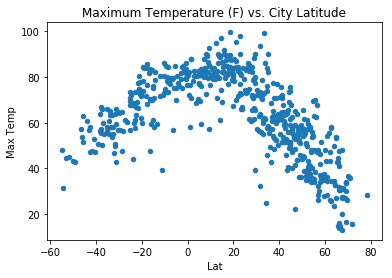

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
latit_vs_Temp_axes = city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", 
                                      title="Maximum Temperature (F) vs. City Latitude")

latit_vs_Temp_axes.get_figure().savefig("../output_data/Temp_vs_Latitude_All_Cities.png")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

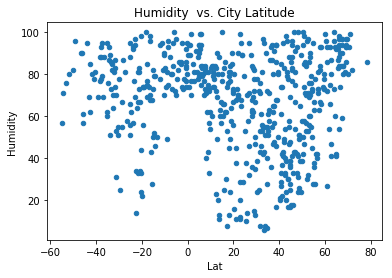

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
latit_vs_Hum_axes = city_data_df.plot(kind="scatter", x="Lat", y="Humidity", 
                                      title="Humidity  vs. City Latitude")

latit_vs_Hum_axes.get_figure().savefig("../output_data/Temp_vs_Humidity_All_Cities.png")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

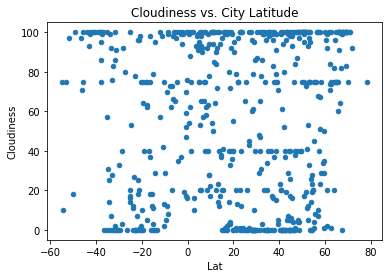

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
latit_vs_Cloudiness_axes = city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", 
                                      title="Cloudiness vs. City Latitude")

latit_vs_Hum_axes.get_figure().savefig("../output_data/Lat_vs_Cloudiness_All_Cities.png")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

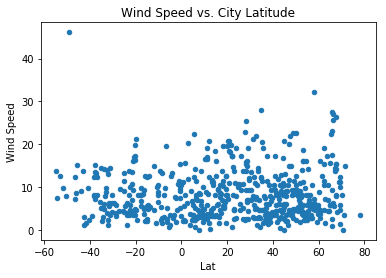

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
latit_vs_wind_axes = city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", 
                                      title="Wind Speed vs. City Latitude")

latit_vs_Hum_axes.get_figure().savefig("../output_data/Lat_vs_Wind_All_Cities.png")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    correlation = stats.pearsonr(x_values, y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,pali,0,IN,1683588048,14,25.7667,73.3333,84.11,6.15
1,northam,100,GB,1683588002,98,51.0333,-4.2167,54.61,7.85
4,todos santos,12,MX,1683588049,68,23.4500,-110.2167,72.45,10.85
7,newman,16,US,1683588044,47,37.3138,-121.0208,77.34,3.91
8,happy valley-goose bay,75,CA,1683587964,60,53.3168,-60.3315,37.71,16.11


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
2,adamstown,100,PN,1683588048,56,-25.0660,-130.1015,70.84,13.29
3,ushuaia,75,AR,1683588048,57,-54.8000,-68.3000,47.86,13.80
5,waitangi,100,NZ,1683587913,95,-43.9535,-176.5597,60.82,8.99
6,blackmans bay,93,AU,1683588049,69,-43.0167,147.3167,56.73,13.80
9,port lincoln,31,AU,1683588049,76,-34.7333,135.8667,57.70,5.10


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7009193762211541
The correlation between both factors is -0.84


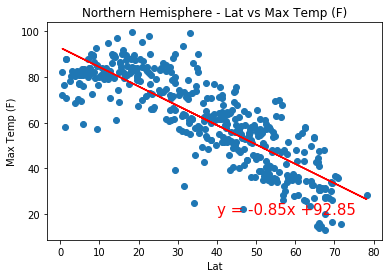

In [45]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Northern",(40, 20))

The r-squared is: 0.5994967246394721
The correlation between both factors is 0.77


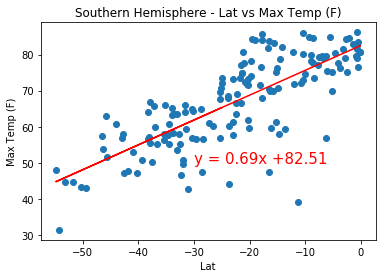

In [46]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Southern",(-30, 50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The Northern hemisphere has a negative correlation with the the maximum temperature whereas in the Southern hemosphere there is a positive correlation with maximum temperature 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.002781686489055418
The correlation between both factors is 0.05


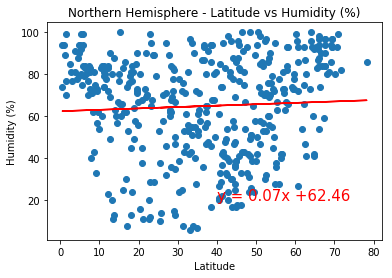

In [38]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))

The r-squared is: 0.008010159680846783
The correlation between both factors is 0.09


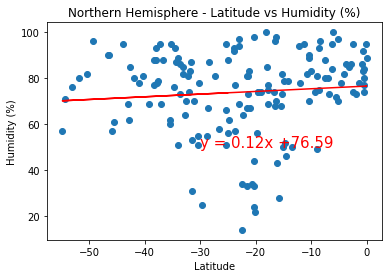

In [50]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(-30, 50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is no correlation between humidity and maximum temperature in Northern or Southern Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.005178301338383147
The correlation between both factors is 0.07


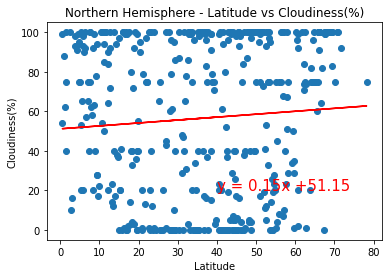

In [53]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(40, 20))

The r-squared is: 0.006149937767688946
The correlation between both factors is -0.08


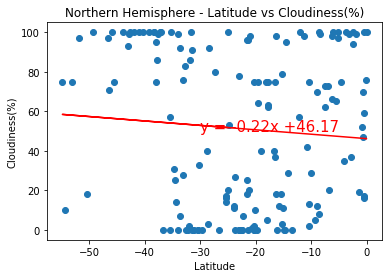

In [52]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(-30, 50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There no correlation between Cloudiness and maximum temperature in Northern or Southern Hemisphere. Perhaps a slight positive correlation for Northern hemisphere and a slight negative correlation for Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00207890326517062
The correlation between both factors is 0.05


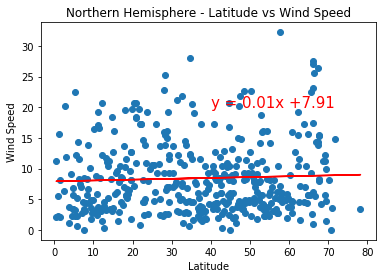

In [55]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed", "Northern",(40, 20))

The r-squared is: 0.027642039390237565
The correlation between both factors is -0.17


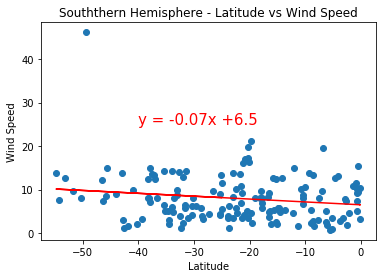

In [56]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed", "Souththern",(-40, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
There is no correlation between wind speed and maximum temperature in Northern or Southern Hemisphere